In [4]:
print("Loading necessary libraries...")
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import os
import cv2

print("Defining functions...")

# Function to extract features from images using SIFT or SURF
def extract_features(image_paths, method):
    descriptors = []
    for path in image_paths:
        image = cv2.imread(path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if method == 'SIFT':
            feature_extractor = cv2.SIFT_create()
        elif method == 'SURF':
            feature_extractor = cv2.xfeatures2d.SURF_create()
        else:
            raise ValueError("Invalid feature extraction method. Choose either 'SIFT' or 'SURF'.")
        kp, des = feature_extractor.detectAndCompute(gray, None)
        if des is not None:
            descriptors.extend(des)
    return np.array(descriptors)

# Function to get image paths
def get_image_paths(directory):
    image_paths = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            image_paths.append(os.path.join(directory, filename))
    return image_paths

# Function to perform KMeans clustering
def perform_kmeans(features, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(features)
    return kmeans

Loading necessary libraries...
Defining functions...


In [5]:
print("Loading image paths...")
# Paths to bike and horse images
bike_directory = "/content/Bike-vs-Horse-classification/Dataset/Bikes"
horse_directory = "/content/Bike-vs-Horse-classification/Dataset/Horses"

# Extract paths to images
bike_paths = get_image_paths(bike_directory)
horse_paths = get_image_paths(horse_directory)

method = input("Enter feature extraction method (SIFT or SURF): ")

Loading image paths...
Enter feature extraction method (SIFT or SURF): SIFT


In [6]:
print(f"Extracting features using {method}...")
# Extract features
if method == 'SIFT':
    bike_features = extract_features(bike_paths, method='SIFT')
    horse_features = extract_features(horse_paths, method='SIFT')
elif method == 'SURF':
    bike_features = extract_features(bike_paths, method='SURF')
    horse_features = extract_features(horse_paths, method='SURF')
else:
    raise ValueError("Invalid feature extraction method. Choose either 'SIFT' or 'SURF'.")

print("Combining features...")
# Combine features
all_features = np.vstack((bike_features, horse_features))

Extracting features using SIFT...
Combining features...


In [7]:
print("Constructing image representations...")
# Construct image representations
num_clusters = int(input("Enter the number of clusters: "))
kmeans = perform_kmeans(all_features, num_clusters)

Constructing image representations...
Enter the number of clusters: 100


In [8]:
X_train = []
y_train = []
for paths, label in [(bike_paths, 0), (horse_paths, 1)]:
    for path in paths:
        image = cv2.imread(path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if method == 'SIFT':
            kp, des = cv2.SIFT_create().detectAndCompute(gray, None)
        elif method == 'SURF':
            kp, des = cv2.xfeatures2d.SURF_create().detectAndCompute(gray, None)
        else:
            raise ValueError("Invalid feature extraction method. Choose either 'SIFT' or 'SURF'.")
        if des is not None:
            hist = np.zeros(num_clusters)
            labels = kmeans.predict(des)
            for l in labels:
                hist[l] += 1
            X_train.append(hist)
            y_train.append(label)
X_train = np.array(X_train)
y_train = np.array(y_train)

print("KMeans clustering completed.")

KMeans clustering completed.


In [9]:
print("Splitting data into train and test sets...")
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Splitting data into train and test sets...


In [10]:
print("Training SVM classifier...")
# Train SVM classifier
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

print("Evaluating classifier...")
# Evaluate classifier
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Training SVM classifier...
Evaluating classifier...
Accuracy: 0.9444444444444444


Printing classification report...
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.90      1.00      0.95        19

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36

Printing confusion matrix...


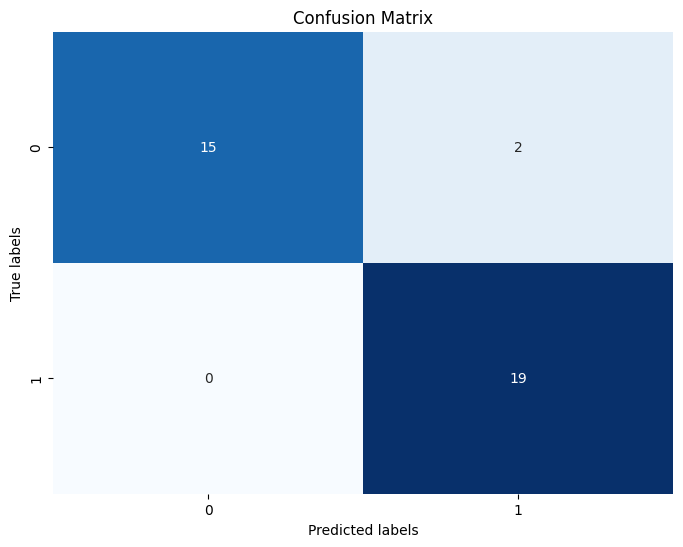

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Printing classification report...")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Printing confusion matrix...")
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
print("Training KNN classifier...")
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("Evaluating KNN classifier...")
# Evaluate KNN classifier
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

print("Training Logistic Regression classifier...")
# Train Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

print("Evaluating Logistic Regression classifier...")
# Evaluate Logistic Regression classifier
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)


Training KNN classifier...
Evaluating KNN classifier...
KNN Accuracy: 0.9166666666666666
Training Logistic Regression classifier...
Evaluating Logistic Regression classifier...
Logistic Regression Accuracy: 0.9444444444444444
